In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 
from keras import backend as K 
#K.set_image_dim_ordering('tf')



In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [ ]:
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()),model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [ ]:
lrate = 0.01 
decay = lrate#/epochs 
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/30
1563/1563 [==============================] - 573s 367ms/step - loss: 1.9452 - accuracy: 0.2837 - val_loss: 1.9433 - val_accuracy: 0.3028
Epoch 2/30
1563/1563 [==============================] - 569s 364ms/step - loss: 1.7586 - accuracy: 0.3528 - val_loss: 1.7925 - val_accuracy: 0.3476
Epoch 3/30
1563/1563 [==============================] - 545s 349ms/step - loss: 1.6794 - accuracy: 0.3825 - val_loss: 1.7487 - val_accuracy: 0.3646
Epoch 4/30
1563/1563 [==============================] - 525s 336ms/step - loss: 1.6384 - accuracy: 0.3953 - val_loss: 1.7124 - val_accuracy: 0.3770
Epoch 5/30
1563/1563 [==============================] - 526s 337ms/step - loss: 1.6071 - accuracy: 0.4076 - val_loss: 1.6560 - val_accuracy: 0.3912
Epoch 6/30
1563/1563 [==============================] - 525s 336ms/step - loss: 1.5816 - accuracy: 0.4176 - val_loss: 1.6673 - val_accuracy: 0.3888
Epoch 7/30
1563/1563 [==============================] - 521s 333ms/step - loss: 1.5631 - accuracy: 0.4249 - val_

In [ ]:
from keras.models import load_model 
model.save('project_model.h5')

In [ ]:
from keras.models import load_model 
model = load_model('project_model.h5')

In [ ]:
import numpy as np 
from tensorflow.keras.preprocessing import image
test_image1 =image.load_img('/content/sample car.jpg',target_size =(32,32))

In [ ]:
test_image =image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

1/1 [==============================] - 0s 164ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Automobile


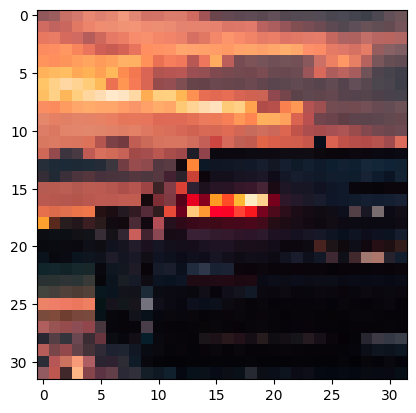

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.imshow(test_image1)